 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

# Popisná statistika v R

bla bla

In [1]:
df_alkohol <- read.table(
    "alcohol_data.csv"
    , sep=","
    , header = T
    , quote = '"'
    , stringsAsFactors = F
)
head(df_alkohol, 2)

Series.Name,Series.Code,Country.Name,Country.Code,X1960..YR1960.,X1961..YR1961.,X1962..YR1962.,X1963..YR1963.,X1964..YR1964.,X1965..YR1965.,⋯,X2007..YR2007.,X2008..YR2008.,X2009..YR2009.,X2010..YR2010.,X2011..YR2011.,X2012..YR2012.,X2013..YR2013.,X2014..YR2014.,X2015..YR2015.,X2016..YR2016.
"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",SH.ALC.PCAP.LI,Afghanistan,AFG,..,..,..,..,..,..,⋯,..,..,..,..,..,..,..,..,1,..
"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",SH.ALC.PCAP.LI,Albania,ALB,..,..,..,..,..,..,⋯,..,..,..,..,..,..,..,..,6.6,..


In [2]:
head(df_alkohol[c("Country.Name", "X2015..YR2015.")])

Country.Name,X2015..YR2015.
Afghanistan,1
Albania,6.6
Algeria,0.6
American Samoa,..
Andorra,9.1
Angola,7.6


In [3]:
df_alkohol <- df_alkohol[c("Country.Name", "X2015..YR2015.")]
colnames(df_alkohol) <- c("Země", "Konzumace_lpc")
head(df_alkohol)

Země,Konzumace_lpc
Afghanistan,1
Albania,6.6
Algeria,0.6
American Samoa,..
Andorra,9.1
Angola,7.6


In [4]:
class(df_alkohol$Konzumace_lpc)

[1] "character"

In [5]:
df_alkohol$Konzumace_lpc <- as.numeric(df_alkohol$Konzumace_lpc)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [6]:
head(df_alkohol)

Země,Konzumace_lpc
Afghanistan,1.0
Albania,6.6
Algeria,0.6
American Samoa,NA
Andorra,9.1
Angola,7.6


In [7]:
df_alkohol <- df_alkohol[!is.na(df_alkohol$Konzumace_lpc),]
head(df_alkohol)

,Země,Konzumace_lpc
1,Afghanistan,1.0
2,Albania,6.6
3,Algeria,0.6
5,Andorra,9.1
6,Angola,7.6
7,Antigua and Barbuda,3.2


In [8]:
summary(df_alkohol$Konzumace_lpc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.925   6.282   6.083   9.002  17.400 

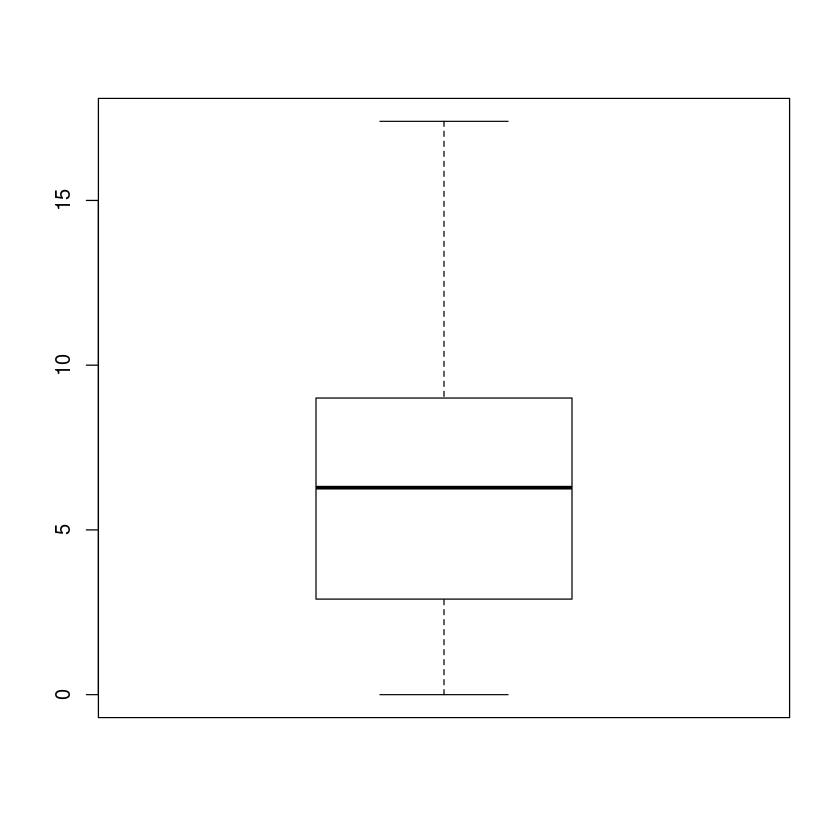

In [9]:
boxplot(df_alkohol$Konzumace_lpc)

In [10]:
attach(df_alkohol)

In [11]:
mean(Konzumace_lpc)
sd(Konzumace_lpc)
median(Konzumace_lpc)

[1] 6.08336

[1] 3.877188

[1] 6.282133

In [12]:
quantile(Konzumace_lpc, c(0.25, 0.5, 0.75))

25%      50%      75% 
2.925000 6.282133 9.002196

In [13]:
min(Konzumace_lpc)
max(Konzumace_lpc)

[1] 0

[1] 17.4

In [14]:
df_alkohol <- df_alkohol[order(df_alkohol$Konzumace_lpc, decreasing = T),]
head(df_alkohol, 10)

,Země,Konzumace_lpc
157,Moldova,17.4
19,Belarus,17.1
135,Lithuania,16.2
195,Russian Federation,14.5
56,Czech Republic,14.1
194,Romania,12.9
202,Serbia,12.9
12,Australia,12.6
189,Portugal,12.5
207,Slovak Republic,12.5


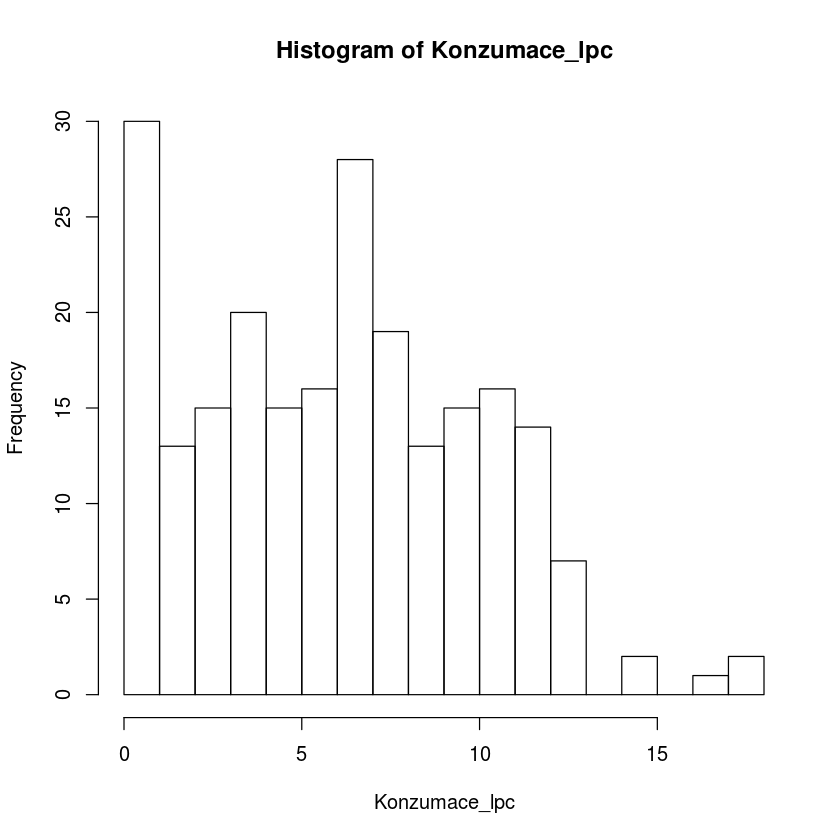

In [15]:
hist(Konzumace_lpc, breaks = 20)

In [16]:
mean(Konzumace_lpc)
sd(Konzumace_lpc)

[1] 6.08336

[1] 3.877188

In [17]:
tail(df_alkohol)
df_alkohol_drinkers <- df_alkohol[df_alkohol$Konzumace_lpc > 1, ]
tail(df_alkohol_drinkers)

,Země,Konzumace_lpc
200,Saudi Arabia,0.2
257,"Yemen, Rep.",0.2
121,Kuwait,0.1
149,Mauritania,0.1
181,Pakistan,0.1
133,Libya,0.0


,Země,Konzumace_lpc
193,Qatar,1.3
242,Tuvalu,1.3
234,Timor-Leste,1.2
238,Tunisia,1.2
251,Vanuatu,1.2
24,Bhutan,1.1


In [18]:
attach(df_alkohol_drinkers)

The following objects are masked from df_alkohol:

    Konzumace_lpc, Země



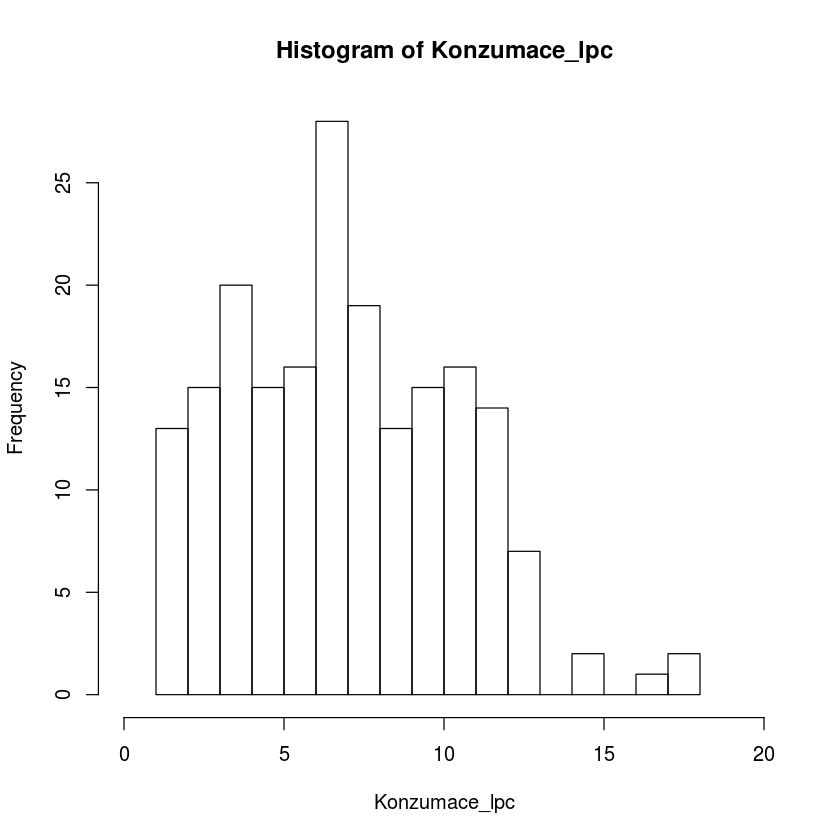

In [19]:
hist(Konzumace_lpc, breaks = 20, xlim = c(0, 20))

In [20]:
mean(Konzumace_lpc)
sd(Konzumace_lpc)

[1] 6.928818

[1] 3.45223

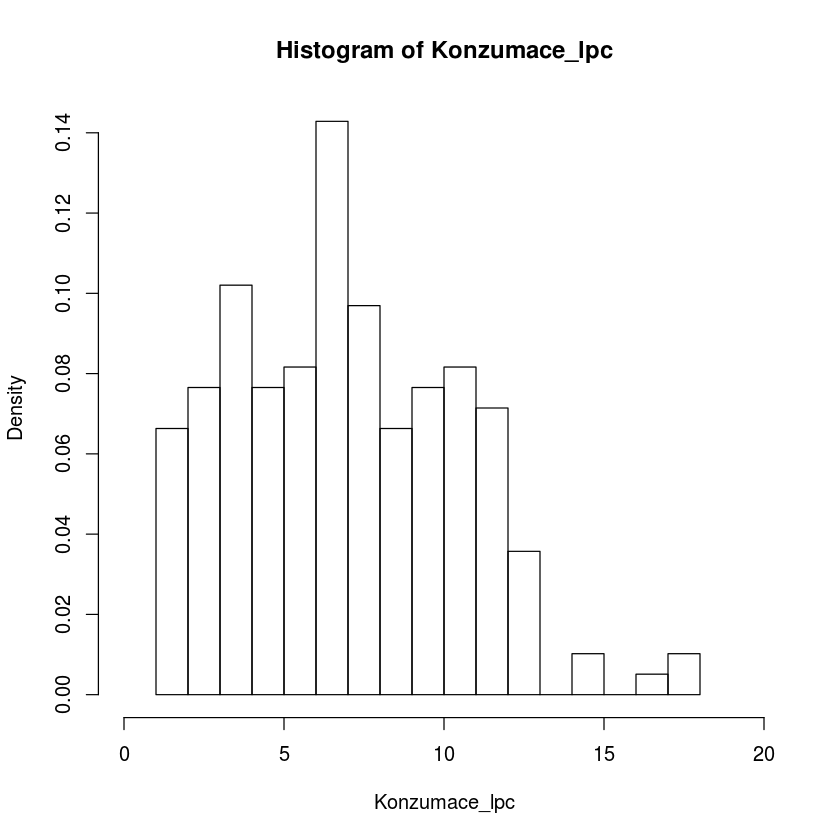

In [21]:
hist(Konzumace_lpc, breaks = 20, xlim = c(0, 20), freq = F)